In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [ ]:
# Dataset from: https://www.kaggle.com/datasets/pushpakhinglaspure/used-car-price-prediction

In [29]:
df = pd.read_csv('cardekho_data.csv')

In [30]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [31]:
df.shape

(301, 9)

In [32]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [33]:
df['dif_price']=df['Present_Price']-df['Selling_Price']

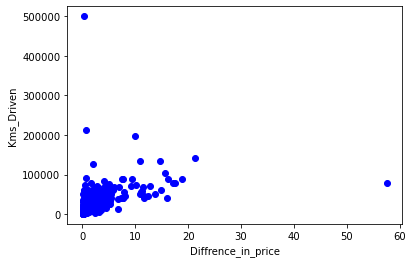

In [34]:
plt.scatter(df.dif_price, df.Kms_Driven,  color='blue')
plt.xlabel("Diffrence_in_price")
plt.ylabel("Kms_Driven")
plt.show()

In [35]:
df[['dif_price','Kms_Driven']].corr()

,dif_price,Kms_Driven
dif_price,1.000000,0.333832
Kms_Driven,0.333832,1.000000


In [36]:
q = df["Kms_Driven"].quantile(0.995)
df = df[df["Kms_Driven"] < q]

In [37]:
df.shape

(299, 10)

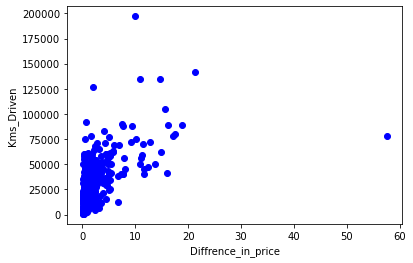

In [38]:
plt.scatter(df.dif_price, df.Kms_Driven,  color='blue')
plt.xlabel("Diffrence_in_price")
plt.ylabel("Kms_Driven")
plt.show()

In [39]:
df[['dif_price','Kms_Driven']].corr()

,dif_price,Kms_Driven
dif_price,1.000000,0.537242
Kms_Driven,0.537242,1.000000


In [40]:
q = df["dif_price"].quantile(0.995)
df = df[df["dif_price"] < q]

In [53]:
le = LabelEncoder()
encoded_data = le.fit_transform(df[['Fuel_Type']])
encoded_data1 = le.fit_transform(df[['Year']])
encoded_data2 = le.fit_transform(df[['Fuel_Type']])

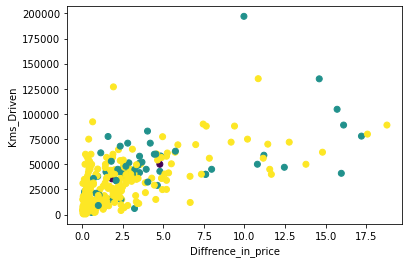

In [46]:
plt.scatter(df.dif_price, df.Kms_Driven,  c=encoded_data)
plt.xlabel("Diffrence_in_price")
plt.ylabel("Kms_Driven")
plt.show()

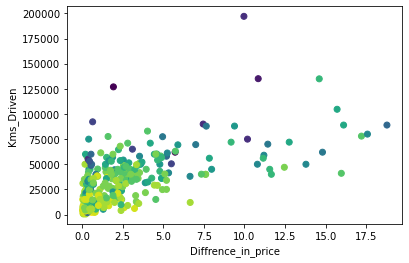

In [49]:
plt.scatter(df.dif_price, df.Kms_Driven,  c=encoded_data1)
plt.xlabel("Diffrence_in_price")
plt.ylabel("Kms_Driven")
plt.show()

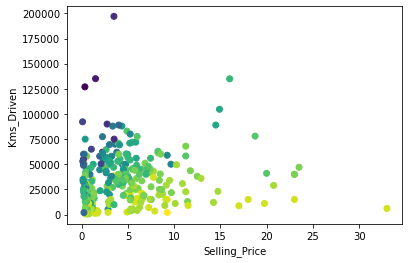

In [51]:
plt.scatter(df.Selling_Price, df.Kms_Driven,  c=encoded_data1)
plt.xlabel("Selling_Price")
plt.ylabel("Kms_Driven")
plt.show()

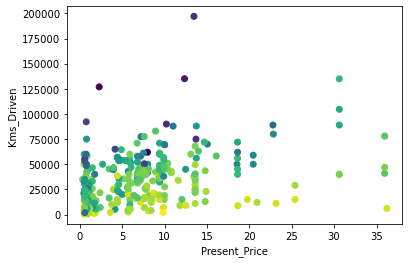

In [52]:
plt.scatter(df.Present_Price, df.Kms_Driven,  c=encoded_data1)
plt.xlabel("Present_Price")
plt.ylabel("Kms_Driven")
plt.show()

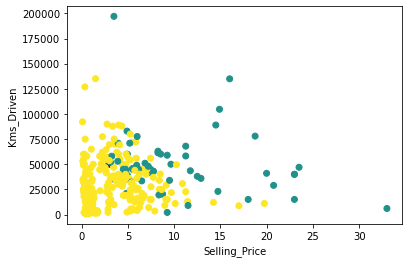

In [54]:
plt.scatter(df.Selling_Price, df.Kms_Driven,  c=encoded_data2)
plt.xlabel("Selling_Price")
plt.ylabel("Kms_Driven")
plt.show()

In [55]:
df[['Present_Price','Kms_Driven',]].corr()

,Present_Price,Kms_Driven
Present_Price,1.00000,0.36563
Kms_Driven,0.36563,1.00000


In [59]:
df['Year'].unique()

array([2014, 2013, 2017, 2011, 2018, 2015, 2016, 2009, 2010, 2012, 2003,
       2008, 2006, 2005, 2004, 2007], dtype=int64)

In [60]:
normalized_df=(df-df.mean())/df.std()

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_7320/209819120.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized_df=(df-df.mean())/df.std()


In [61]:
normalized_df.head()

,Car_Name,Fuel_Type,Kms_Driven,Owner,Present_Price,Seller_Type,Selling_Price,Transmission,Year,dif_price
0,NaN,NaN,-0.285686,-0.186349,-0.246529,NaN,-0.260289,NaN,0.106627,-0.141842
1,NaN,NaN,0.340184,-0.186349,0.311759,NaN,0.032125,NaN,-0.245242,0.584387
2,NaN,NaN,-1.071937,-0.186349,0.355574,NaN,0.554293,NaN,1.162234,-0.039315
3,NaN,NaN,-1.138436,-0.186349,-0.450057,NaN,-0.364723,NaN,-0.948980,-0.409550
4,NaN,NaN,0.318670,-0.186349,-0.065615,NaN,0.000795,NaN,0.106627,-0.133298


In [62]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [65]:
msk = np.random.rand(len(df)) < 0.8
train = normalized_df[msk]
test = normalized_df[~msk]

In [66]:
x = np.asanyarray(train[['Kms_Driven','Year']])
y = np.asanyarray(train[['Present_Price']])
regr.fit (x, y)

LinearRegression()

In [67]:
y_hat= regr.predict(test[['Kms_Driven','Year']])
x = np.asanyarray(test[['Kms_Driven','Year']])
y = np.asanyarray(test[['Present_Price']])
regr.score(x, y)

0.0966634479741253

In [69]:
print('im stupid')

im stupid


In [70]:
regr = linear_model.LinearRegression()

In [71]:
msk = np.random.rand(len(df)) < 0.8
train = normalized_df[msk]
test = normalized_df[~msk]

In [72]:
x = np.asanyarray(train[['Kms_Driven','Year','Selling_Price']])
y = np.asanyarray(train[['Present_Price']])
regr.fit (x, y)

LinearRegression()

In [73]:
y_hat= regr.predict(test[['Kms_Driven','Year','Selling_Price']])
x = np.asanyarray(test[['Kms_Driven','Year','Selling_Price']])
y = np.asanyarray(test[['Present_Price']])
regr.score(x, y)

0.8726590672737597

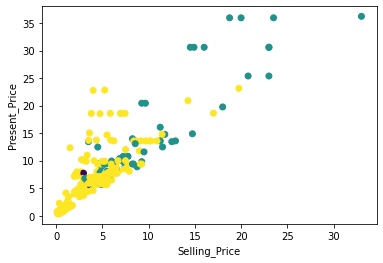

In [74]:
plt.scatter(df.Selling_Price, df.Present_Price,  c=encoded_data)
plt.xlabel("Selling_Price")
plt.ylabel("Present_Price")
plt.show()

In [75]:
regr1 = linear_model.LinearRegression()
msk = np.random.rand(len(df)) < 0.8
train1 = normalized_df[msk]
test1 = normalized_df[~msk]

In [76]:
x = np.asanyarray(train1[['Selling_Price']])
y = np.asanyarray(train1[['Present_Price']])
regr1.fit (x, y)

LinearRegression()

In [79]:
y_hat= regr1.predict(test1[['Selling_Price']])
x = np.asanyarray(test1[['Selling_Price']])
y = np.asanyarray(test1[['Present_Price']])
regr1.score(x, y)

0.8378639348258232